You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
x = np.load("X.npy") # image
y = np.load("Y.npy") # label

In [ ]:
n1,n2,n3 = x.shape
x = x.flatten().reshape(n1,n2*n3)
print(x.shape)
print(y.shape)

(2062, 4096)
(2062, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1443, 4096)
(1443, 10)
(619, 4096)
(619, 10)


# Theory
- Logistic Regression can be Binary Logistic Regression as well as Multinomial Regression. 
- Binary Logistic Regression is based on probabilities threshold.
- Multinomial Regression is of two type -
- One Vs All - In this n models are trained which return the probalities of the sample beloging to that class. The class which has the highest probabilities is predicted .
- One Vs One - In this n(n-1)/2 models are trained. Each models returns whether the sample belong to one class or the other class. Each model is trained between Two class. Every model gives its votes to a certain class and the class which has the highest votes is selected.

In [ ]:
class LogisticRegression:
  def __init__(self):
    pass
  
  def train(self,X_train,y_train):
    self.y = y_train
    self.X = X_train
    self.m ,self.n = X_train.shape
    self.X = np.hstack((np.ones((self.m,1)),self.X))
    self.m ,self.n = self.X.shape
    self.theta = np.ones((self.n,self.y.shape[1]))
    self.h = self.sigmoid(self.X@self.theta)

  def compute(self,alpha,iter):
    epsilon = 1e-2
    self.cost = np.ones((iter,self.y.shape[1]))
    # self.w = np.ones((iter,self.n))
    for j in range(10):
      for i in range(iter):
        self.theta[:,j] = self.theta[:,j] - ( alpha/self.m ) * self.X.T@(self.h[:,j]-self.y[:,j])
        self.h[:,j] = self.sigmoid(self.X@self.theta[:,j])
        self.cost[i][j] = (1/self.m)*(((-self.y[:,j]).T @ np.log(self.h[:,j] + epsilon))-((1-self.y[:,j]).T @ np.log((1-self.h[:,j]) + epsilon)))
      # self.w[i] = self.theta.T
    return self.cost

  def sigmoid(self,X):
    return 1 / (1 + np.exp(-X))

  def predict(self,X_test):
    h = self.sigmoid(X_test@self.theta)
    return np.argmax(h,axis=1)

In [ ]:
l = LogisticRegression()
l.train(X_train,y_train)

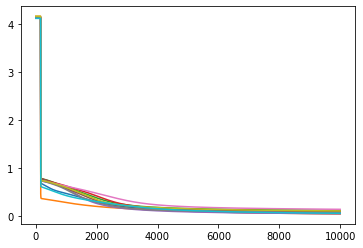

In [ ]:
cost = l.compute(0.01,10000)
plt.figure()
for i in range(10):
  plt.plot(range(10000),cost[:,i])
plt.show()

In [ ]:
xtest = np.hstack((np.ones((X_test.shape[0],1)),X_test))
ytest = np.argmax(y_test,axis=1)
ypredict = l.predict(xtest)
ypredict.shape

(619,)

In [ ]:
print(accuracy_score(ytest,ypredict))
print(confusion_matrix(ytest,ypredict))

0.7576736672051696


In [ ]:
class LogisticRegressionOvO:
  def __init__(self):
    pass
  def train(self,X_train,y_train):
    self.y = y_train
    self.X = X_train
    self.m ,self.n = X_train.shape
    self.X = np.hstack((np.ones((self.m,1)),self.X))
    self.m ,self.n = self.X.shape
    self.theta = np.ones((self.n,1))
    self.h = self.sigmoid(self.X@self.theta)

  def compute(self,alpha,iter):
    epsilon = 1e-5
    self.cost = np.ones((iter,1))
    # self.w = np.ones((iter,self.n))
    for i in range(iter):
      self.theta = self.theta - ( alpha/self.m ) * self.X.T@(self.h-self.y)
      self.h = self.sigmoid(self.X@self.theta)
      self.cost[i] = (1/self.m)*(((-self.y).T @ np.log(self.h + epsilon))-((1-self.y).T @ np.log((1-self.h) + epsilon)))
      # self.w[i] = self.theta.T
    return self.theta

  def sigmoid(self,X):
    return 1 / (1 + np.exp(-X))

  def predict(self,X_test,theta):
    h = self.sigmoid(X_test@theta)
    return np.rint(h)

In [ ]:
l = LogisticRegressionOvO()
y_train_class = np.argmax(y_train,axis=1)
theta = []
for i in range(10):
  for j in range(i+1,10):
    indicesi = np.argwhere(y_train_class==i).flatten()
    indicesj = np.argwhere(y_train_class==j).flatten()
    indices = np.append(indicesi,indicesj)
    xtrain = X_train[indices,:]
    print(xtrain.shape)
    ytrain = y_train[indices,i][:,np.newaxis]
    l.train(xtrain,ytrain)
    theta.append(l.compute(0.01,10000))


In [ ]:
xtest = np.hstack((np.ones((X_test.shape[0],1)),X_test))
theta_numpy = np.array(theta)
pred = np.zeros((theta_numpy.shape[0],xtest.shape[0]))
for i in range(45):
  pred[i]=l.predict(xtest,theta_numpy[i]).flatten()

In [ ]:
pred_T = pred.transpose()
ypredict = []
i=0
for x in pred_T:
  k=0
  votes = np.zeros(10)
  for i in range(10):
    for j in range(i+1,10):
      if x[k]==1:
        votes[i]=votes[i]+1
      else:
        votes[j]=votes[j]+1
      k=k+1
  ypredict.append(np.argmax(votes,axis=0))
  i = i+1

In [ ]:
ytest = np.argmax(y_test,axis=1)
print(accuracy_score(ytest,ypredict))
print(confusion_matrix(ytest,ypredict))

0.7350565428109854
[[49  0  1  0  1  1  3  1  0  4]
 [ 3 56  1  0  4  1  3  0  0  0]
 [ 1  2 42  1  1  2  1  0  7  0]
 [ 3  0  3 41  0  1  7  1  5  1]
 [ 1  1  2  0 52  4  0  1  4  0]
 [ 5  0  9  3  0 41  1  0  1  0]
 [ 7  0  7  7  0  3 34  0  0  1]
 [ 8  1  2  2  2  1  0 44  1  2]
 [ 1  1  2  6  5  0  0  3 51  0]
 [ 4  0  1  0  0  1  1  4  0 45]]


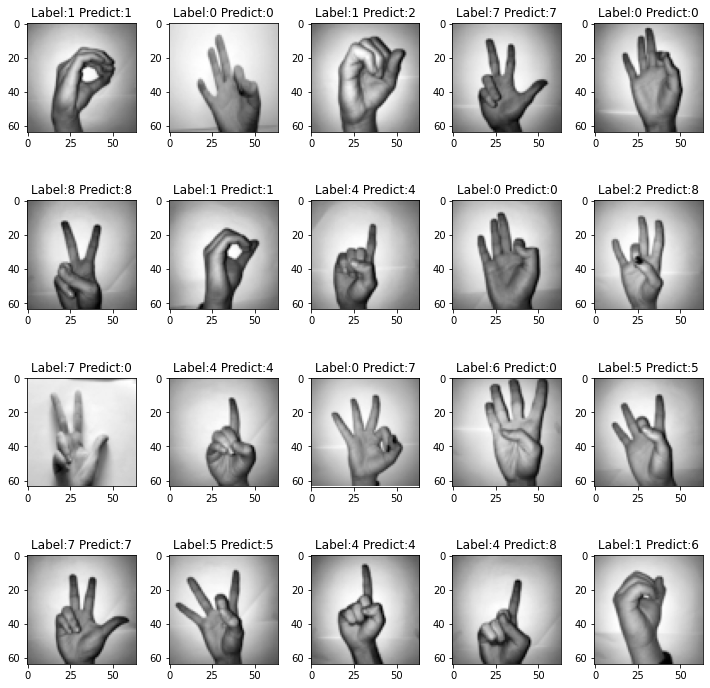

In [ ]:
#plotting the images
num = 20
images = X_test[:num,:].reshape(num,64,64)
labels = ytest[:num]
predictlabels = ypredict[:num]

# plot images
fig, axes = plt.subplots(4,5, figsize=(2*num_col,2.5*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label:{labels[i]} Predict:{predictlabels[i]}')
plt.tight_layout()
plt.show()

In [ ]:
# Schikit Learn Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
L = LogisticRegression(multi_class='ovr',max_iter=10000)
ytrain = np.argmax(y_train,axis=1)
L.fit(X_train,ytrain)
ypredict = L.predict(X_test)
print(accuracy_score(ytest,ypredict))
print(confusion_matrix(ytest,ypredict))

0.7318255250403877
[[48  1  1  0  1  4  3  1  0  1]
 [ 2 57  1  3  2  1  2  0  0  0]
 [ 0  0 45  2  1  2  1  2  4  0]
 [ 0  0  2 48  0  3  4  0  5  0]
 [ 1  1  2  0 51  5  0  1  4  0]
 [ 7  0  8  2  0 39  4  0  0  0]
 [ 1  0 11 13  0  3 31  0  0  0]
 [ 2  0  4  1  0  0  0 49  3  4]
 [ 1  0  7  9  3  1  1  5 42  0]
 [ 1  1  0  0  0  1  4  6  0 43]]


# OBSERVATION
- The observerd accuracy for one vs all is 0.75
- The observerd accuracy for one vs one is 0.73
- The observed accuracy for one vs all sklearn is 0.73
- It is known that the one vs one accuracy is more than one vs all but in this case due to draw between voting. To gain more accuracy it is advisable to have tie breakers.